## Import Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from scipy.stats import pearsonr
import numpy as np
from sklearn.preprocessing import StandardScaler
import random
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import TruncatedSVD
#from statsmodels.stats.proportion import proportions_ztest
import itertools

matchup_df = pd.read_csv('./Data_Needs_updated_after_selection_sunday/Tournament Matchups.csv')
matchup_df = matchup_df[~matchup_df['YEAR'].isin([2008, 2009])]

# Read both CSVs and set 'TEAM NO' as the index
df_all = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Resumes.csv")
df_temp = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Shooting Splits.csv")
df_temp2 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings Away.csv")
df_temp3 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings Home.csv")
df_temp4 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings Neutral.csv")
df_temp5 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/KenPom Barttorvik.csv")

df_temp6 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Barttorvik Away.csv")
df_temp7 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Barttorvik Home.csv")
df_temp8 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/Barttorvik Neutral.csv")
#df_temp9 = pd.read_csv("./Data_Needs_updated_after_selection_sunday/EvanMiya.csv")

# removing columns that are not needed
df_all = df_all.drop(columns=['TEAM', 'BID TYPE'])
df_temp = df_temp.drop(columns=['YEAR', 'TEAM ID', 'TEAM', "CONF"])
df_temp2 = df_temp2.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM"])
df_temp3 = df_temp3.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM"])
df_temp4 = df_temp4.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM"])
df_temp5 = df_temp5.drop(columns=["YEAR", "SEED", "ROUND", "TEAM", "TEAM ID", "CONF","CONF ID","QUAD NO","QUAD ID"])

df_temp6 = df_temp6.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM", "TEAM ID"])
df_temp7 = df_temp7.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM", "TEAM ID"])
df_temp8 = df_temp8.drop(columns=['YEAR', 'SEED', 'ROUND', "TEAM ID"])
#df_temp9 = df_temp9.drop(columns=['YEAR', 'SEED', 'TEAM', 'ROUND'])

# Standardize 'TEAM NO'
df_all['TEAM NO'] = df_all['TEAM NO'].astype(str).str.strip()
df_temp['TEAM NO'] = df_temp['TEAM NO'].astype(str).str.strip()
df_temp2['TEAM NO'] = df_temp2['TEAM NO'].astype(str).str.strip()
df_temp3['TEAM NO'] = df_temp3['TEAM NO'].astype(str).str.strip()
df_temp4['TEAM NO'] = df_temp4['TEAM NO'].astype(str).str.strip()
df_temp5['TEAM NO'] = df_temp5['TEAM NO'].astype(str).str.strip()

df_temp6['TEAM NO'] = df_temp6['TEAM NO'].astype(str).str.strip()
df_temp7['TEAM NO'] = df_temp7['TEAM NO'].astype(str).str.strip()
df_temp8['TEAM NO'] = df_temp8['TEAM NO'].astype(str).str.strip()
#df_temp9['TEAM NO'] = df_temp9['TEAM NO'].astype(str).str.strip()

# Remove duplicates
df_all = df_all.drop_duplicates(subset='TEAM NO')
df_temp = df_temp.drop_duplicates(subset='TEAM NO')
df_temp2 = df_temp2.drop_duplicates(subset='TEAM NO')
df_temp3 = df_temp3.drop_duplicates(subset='TEAM NO')
df_temp4 = df_temp4.drop_duplicates(subset='TEAM NO')
df_temp5 = df_temp5.drop_duplicates(subset='TEAM NO')
df_temp6 = df_temp6.drop_duplicates(subset='TEAM NO')
df_temp7 = df_temp7.drop_duplicates(subset='TEAM NO')
df_temp8 = df_temp8.drop_duplicates(subset='TEAM NO')
#df_temp9 = df_temp9.drop_duplicates(subset='TEAM NO')

# Set 'TEAM NO' as the index
df_all = df_all.set_index('TEAM NO')
df_temp = df_temp.set_index('TEAM NO')
df_temp2 = df_temp2.set_index('TEAM NO')
df_temp3 = df_temp3.set_index('TEAM NO')
df_temp4 = df_temp4.set_index('TEAM NO')
df_temp5 = df_temp5.set_index("TEAM NO")

df_temp6 = df_temp6.set_index('TEAM NO')
df_temp7 = df_temp7.set_index("TEAM NO")
df_temp8 = df_temp8.set_index('TEAM NO')
#df_temp9 = df_temp9.set_index('TEAM NO')

# Optional: Rename columns to avoid conflicts
df_temp.columns = [f"ShootingSplits_{col}" for col in df_temp.columns]
df_temp2.columns = [f"TeamRankings_Away_{col}" for col in df_temp2.columns]
df_temp3.columns = [f"TeamRankings_Home_{col}" for col in df_temp3.columns]
df_temp4.columns = [f"TeamRankings_Neutral_{col}" for col in df_temp4.columns]
df_temp5.columns = [f"KenPom_Barttorvik_{col}" for col in df_temp5.columns]
df_temp6.columns = [f"Barttorvik_Away_{col}" for col in df_temp6.columns]
df_temp7.columns = [f"Barttorvik_Home_{col}" for col in df_temp7.columns]
df_temp8.columns = [f"Barttorvik_Neutral_{col}" for col in df_temp8.columns]
#df_temp9.columns = [f"EvanMiya_{col}" for col in df_temp9.columns]

list_csvs = [df_temp, df_temp2, df_temp3, df_temp4, df_temp5, df_temp6, df_temp7, df_temp8]


# Now join on the index (TEAM NO)
df_all = df_all.join(df_temp, how='outer')
df_all = df_all.join(df_temp2, how='outer')
df_all = df_all.join(df_temp3, how='outer')
df_all = df_all.join(df_temp4, how='outer')
df_all = df_all.join(df_temp5, how='outer')

df_all = df_all.join(df_temp6, how='outer')
df_all = df_all.join(df_temp7, how='outer')
df_all = df_all.join(df_temp8, how='outer')
#df_all = df_all.join(df_temp9, how='outer')
# Reset index if needed
df_all = df_all.dropna(axis=0)
df_all = df_all.reset_index()

df_all = df_all[df_all['YEAR'] != 2008]
df_all = df_all[df_all['YEAR'] != 2009]
df_all = df_all.dropna(axis=0)
df_all = df_all.drop(columns=['YEAR'])

df_all.rename(columns={'Barttorvik_Neutral_TEAM': 'TEAM'}, inplace=True)

df_all.head()

,TEAM NO,SEED,ROUND,NET RPI,RESUME,WAB RANK,ELO,B POWER,Q1 W,Q2 W,...,Barttorvik_Neutral_BADJT RANK,Barttorvik_Neutral_AVG HGT RANK,Barttorvik_Neutral_EFF HGT RANK,Barttorvik_Neutral_EXP RANK,Barttorvik_Neutral_TALENT RANK,Barttorvik_Neutral_FT% RANK,Barttorvik_Neutral_OP FT% RANK,Barttorvik_Neutral_PPPO RANK,Barttorvik_Neutral_PPPD RANK,Barttorvik_Neutral_ELITE SOS RANK
0,1000,12,64,54,83,63,24,58.7,1,3,...,284.0,282.0,162.0,95.0,173.0,98.0,60.0,71.0,29.0,159.0
1,1001,6,8,17,40,29,33,11.7,3,6,...,69.0,61.0,26.0,293.0,17.0,57.0,120.0,83.0,247.0,26.0
2,1002,4,1,8,19,13,15,5.3,6,6,...,277.0,28.0,61.0,258.0,23.0,115.0,84.0,19.0,68.0,7.0
3,1003,12,64,51,110,32,18,69.3,0,2,...,45.0,197.0,201.0,162.0,339.0,89.0,136.0,141.0,11.0,227.0
4,1004,15,64,101,165,103,74,106.3,0,1,...,140.0,117.0,52.0,116.0,339.0,135.0,43.0,9.0,202.0,253.0


In [2]:
# Write column names to a text file, one per line
with open("columns.txt", "w") as f:
    for col in df_all.columns:
        f.write(col + "\n")

In [3]:
features = ['ShootingSplits_DUNKS FG%', 'ShootingSplits_CLOSE TWOS FG%', 'ShootingSplits_THREES FG%', 'Q1 W']

# Create a results dictionary
results = {}

for feature in features:
    mean_val = df_all[feature].mean()
    median_val = df_all[feature].median()
    mode_val = df_all[feature].mode().tolist()  # In case of multiple modes
    results[feature] = {
        'mean': mean_val,
        'median': median_val,
        'mode': mode_val
    }

# Convert results to a DataFrame for better readability (optional)
summary_df = pd.DataFrame(results).T  # Transpose so features are rows

print(summary_df)

                                    mean median          mode
ShootingSplits_DUNKS FG%       89.605952   90.1        [89.1]
ShootingSplits_CLOSE TWOS FG%  62.498701   62.5        [62.8]
ShootingSplits_THREES FG%      35.554762   35.5  [34.9, 36.5]
Q1 W                            3.983766    4.0           [0]


## Hypothesis Testing

In [4]:
def correlate_with_win_pct(df, team_col, win_pct_col, drop_columns=None):
    """
    Computes Pearson correlation between numeric columns in `df` and historical win percentages from `team_stats_df`.
    
    Parameters:
    - df: DataFrame with team features and a team name column.
    - team_col: Column name for team names.
    - win_pct_col: Column name for win percentage.
    - drop_columns: List of column names to exclude from correlation testing.
    
    Returns:
    - DataFrame with:
        - variable_name
        - test_statistic (Pearson r)
        - p-value
        - significant_relationship (Bonferroni corrected)
    """
    if drop_columns is None:
        drop_columns = []

    df = df.copy()

    # Convert percentage strings like "40.0%" to float if needed
    if df[win_pct_col].dtype == 'object':
        df[win_pct_col] = (
            df[win_pct_col]
            .str.replace('%', '', regex=False)
            .astype(float) / 100
        )

    variable_names = []
    list_corr_values = []
    list_p_values = []

    for col in df.columns:
        if col in [team_col, win_pct_col] or col in drop_columns:
            continue
        if pd.api.types.is_numeric_dtype(df[col]):
            valid = df[[col, win_pct_col]].dropna()
            if len(valid) >= 2:
                corr, pval = pearsonr(valid[col], valid[win_pct_col])
                variable_names.append(col)
                list_corr_values.append(corr)
                list_p_values.append(pval)

    # Create result DataFrame
    result_df = pd.DataFrame({
        'variable_name': variable_names,
        'test_statistic (Pearson r)': list_corr_values,
        'p-value': list_p_values
    })

    # Bonferroni correction
    alpha = 0.05
    num_tests = len(variable_names)
    result_df['significant_relationship'] = result_df['p-value'] < (alpha / num_tests)

    return result_df

In [5]:
pearsons_results = correlate_with_win_pct(df_all, team_col="TEAM NO", win_pct_col='KenPom_Barttorvik_WIN%')
pearsons_results.to_csv('person_results.csv', index=False)
pearsons_results = pearsons_results.sort_values(by='p-value')
pearsons_results.head(20)

,variable_name,test_statistic (Pearson r),p-value,significant_relationship
11,PLUS 500,0.982372,0.000000e+00,True
177,Barttorvik_Away_WIN%,0.805842,4.810376e-212,True
176,Barttorvik_Away_L,-0.799827,1.335527e-206,True
5,ELO,-0.734922,1.087078e-157,True
256,Barttorvik_Home_WIN%,0.706887,8.303568e-141,True
132,KenPom_Barttorvik_WAB,0.686095,1.581284e-129,True
255,Barttorvik_Home_L,-0.670367,1.321054e-121,True
211,Barttorvik_Away_WAB,0.650440,3.037242e-112,True
4,WAB RANK,-0.634550,2.861325e-105,True
175,Barttorvik_Away_W,0.616438,8.366582e-98,True


In [6]:
# plt.scatter(df_all['ShootingSplits_THREES FG%'], df_all['KenPom_Barttorvik_WIN%'])
# plt.xlabel('Threes FG % Rank')
# plt.ylabel('WIN %')
# plt.title('Threes FG % Rank vs Win %')
# plt.show()

In [7]:
pearsons_results = pearsons_results[pearsons_results['significant_relationship'] == True]
len(pearsons_results)

259

**Kruskal-Wallis Comparing Each Feature to Tournament Round Rached**

In [8]:
team_rankings_df = pd.read_csv("./Data_Needs_updated_after_selection_sunday/TeamRankings.csv")

round_reached_all_time = team_rankings_df[['TEAM NO', 'ROUND']]

round_reached_dict = dict(zip(round_reached_all_time['TEAM NO'], round_reached_all_time['ROUND']))

def create_stat_vs_round_vector(df, feature_name):
    stat_vector = []
    round_vector = []
    stat_dict = dict(zip(df['TEAM NO'], df[feature_name]))
    
    for team_no in round_reached_dict:
        if team_no > 131 and team_no <= 1000:
            team_no = str(team_no)
            if team_no in stat_dict:
                stat_vector.append(stat_dict[team_no])
                
                team_no = int(team_no)
                round_vector.append(round_reached_dict[team_no])
            
    return stat_vector, round_vector

In [9]:
import seaborn as sns
from scipy.stats import kruskal
import numpy as np

list_KW_values = []
list_p_values = []
valid_columns = []

def perform_kruskal_wallis(df):
    features = df.columns

    for feature_name in features:
        
        samples_by_group = []

        stat_vector, round_vector = create_stat_vs_round_vector(df, feature_name)

        stat_vector = np.array(stat_vector)
        round_vector = np.array(round_vector)
        
        # Combines data for champion, finalist, and final four teams 
        replace_dict = {1 : 4, 2 : 4}
        rounds = np.array([replace_dict.get(x, x) for x in round_vector])
        
        for value in np.unique(rounds):
            mask = rounds == value
            data = stat_vector[mask]
            if len(np.unique(data)) > 1:
                samples_by_group.append(data)
        
        
        if len(samples_by_group) >= 2:
            stat, p = kruskal(*samples_by_group)
            list_KW_values.append(stat)
            list_p_values.append(p)
            valid_columns.append(feature_name)
        

        # sns.violinplot(x = rounds, y = stat_vector)

        # plt.title(f'{feature_name} vs Round')
        # plt.xlabel('Round Reached')
        # plt.ylabel(feature_name)
        # plt.show()

    df2 = pd.DataFrame({
        'variable_name': valid_columns,
        'test_statistic (K.W.)': list_KW_values,
        'p-value': list_p_values
    })
    alpha = 0.05
    num_hypothesis_tests = len(valid_columns)

    # Bonferroni Correction
    df2['significant_relationship'] = df2['p-value'] < (alpha / num_hypothesis_tests)

    return df2

In [10]:
KW_results = perform_kruskal_wallis(df_all)
KW_significant_results = KW_results[KW_results['significant_relationship'] == True]
KW_significant_results = KW_significant_results.sort_values(by = 'p-value')
print(f'Number of Significant Features: {len(KW_significant_results)}')
print(KW_significant_results.head(20))

Number of Significant Features: 190
                      variable_name  test_statistic (K.W.)       p-value  \
133           KenPom_Barttorvik_WAB             310.904995  4.526707e-65   
4                          WAB RANK             310.806685  4.752536e-65   
1                              SEED             305.947454  5.271024e-64   
12                          R SCORE             301.758481  4.193695e-63   
95        KenPom_Barttorvik_BARTHAG             300.492257  7.849334e-63   
92        KenPom_Barttorvik_BADJ EM             299.357840  1.376324e-62   
90        KenPom_Barttorvik_KADJ EM             297.304344  3.803449e-62   
137  KenPom_Barttorvik_BARTHAG RANK             296.834404  4.799545e-62   
6                           B POWER             296.243742  6.429422e-62   
134  KenPom_Barttorvik_BADJ EM RANK             295.221598  1.066329e-61   
91   KenPom_Barttorvik_KADJ EM RANK             293.447021  2.566462e-61   
2                           NET RPI             280.

In [11]:
# sns.violinplot(x = df_all['ROUND'], y = df_all['ShootingSplits_THREES FG%'])

# plt.title('Threes FG % vs Round')
# plt.xlabel('Round Reached')
# plt.ylabel('Threes FG %')
# plt.show()

In [12]:
significant_features = KW_significant_results['variable_name'].tolist()
significant_features_df = df_all[significant_features]
significant_features_df.head()

,KenPom_Barttorvik_WAB,WAB RANK,SEED,R SCORE,KenPom_Barttorvik_BARTHAG,KenPom_Barttorvik_BADJ EM,KenPom_Barttorvik_KADJ EM,KenPom_Barttorvik_BARTHAG RANK,B POWER,KenPom_Barttorvik_BADJ EM RANK,...,Barttorvik_Home_EFG%,Barttorvik_Neutral_PPPO,Barttorvik_Away_TOV% RANK,Barttorvik_Away_TOV%,ShootingSplits_DUNKS D SHARE RANK,KenPom_Barttorvik_FTRD,Barttorvik_Neutral_PPPO RANK,ShootingSplits_THREES FG%D,Barttorvik_Home_FTR RANK,ShootingSplits_FARTHER TWOS FG%D RANK
0,-0.7,63,12,3.9,0.791,11.8,12.50860,67,58.7,68,...,53.7,1.083,21,15.3,8.0,26.7,71.0,31.3,302,250.0
1,1.9,29,6,97.9,0.913,21.0,20.65450,14,11.7,15,...,57.4,1.072,136,18.0,67.0,19.8,83.0,33.6,320,88.0
2,4.9,13,4,99.6,0.947,26.4,25.36860,5,5.3,3,...,55.7,1.147,255,19.8,86.0,38.7,19.0,29.7,86,27.0
3,1.7,32,12,9.5,0.782,11.5,11.76070,74,69.3,70,...,52.6,1.037,105,17.5,16.0,24.7,141.0,30.1,158,179.0
4,-3.6,103,15,0.0,0.651,5.9,5.29267,113,106.3,108,...,59.1,1.171,82,17.1,38.0,20.3,9.0,35.6,210,321.0


In [13]:
# 1) Compute the full correlation matrix in pandas
corr_matrix = significant_features_df.corr(method='pearson')

threshold = 0.9
high_corr_pairs = []
cols = corr_matrix.columns
for i in range(len(cols)):
    for j in range(i+1, len(cols)):
        r = corr_matrix.iloc[i, j]
        if abs(r) >= threshold:
            high_corr_pairs.append((cols[i], cols[j], r))

print('Number of Highly Correlated pairs:', len(high_corr_pairs))

to_drop = set()

# print("Highly correlated feature pairs (|r| ≥ 0.9):")
for f1, f2, r in high_corr_pairs:
    to_drop.add(f2)
    # print(f"  {f1} ↔ {f2}: r = {r:.3f}")

# 3) If you want the exact p‑value for a given pair you can use scipy.stats.pearsonr
#    (e.g. for the first high‑corr pair)

reduced_df = significant_features_df.drop(columns = to_drop)

print('Number of features dropped:', len(to_drop))

if high_corr_pairs:
    f1, f2, r = high_corr_pairs[0]
    r_val, p_val = pearsonr(significant_features_df[f1], significant_features_df[f2])
    print(f"\nFor {f1} vs {f2}: Pearson r = {r_val:.3f}, p‑value = {p_val:.3g}")

print('Number of features remaining after dropping redundant features:', len(reduced_df.columns))

Number of Highly Correlated pairs: 348
Number of features dropped: 104

For KenPom_Barttorvik_WAB vs WAB RANK: Pearson r = -0.935, p‑value = 0
Number of features remaining after dropping redundant features: 86


In [14]:
# Add visualization here

## Standardize

In [15]:
df_all = df_all.drop(columns=['TEAM', 'ROUND'])

scaler = StandardScaler()
cols_to_scale = [col for col in df_all.columns if col != 'TEAM NO']
df_all_scaled = pd.DataFrame(
    scaler.fit_transform(df_all[cols_to_scale]),
    columns=cols_to_scale
)
df_all_scaled['TEAM NO'] = df_all['TEAM NO']
print(df_all_scaled.shape)
print(df_all_scaled.head()) 

(924, 408)
       SEED   NET RPI    RESUME  WAB RANK       ELO   B POWER      Q1 W  \
0  0.725899  0.042834  0.270851  0.254861 -0.515215  0.037936 -0.898458   
1 -0.568948 -0.650537 -0.364530 -0.412810 -0.307056 -0.760649 -0.296227   
2 -1.000563 -0.819194 -0.674832 -0.727008 -0.723373 -0.869392  0.607119   
3  0.725899 -0.013386  0.669810 -0.353898 -0.653987  0.218042 -1.199573   
4  1.373322  0.923601  1.482506  1.040355  0.641221  0.846715 -1.199573   

       Q2 W  Q1 PLUS Q2 W   Q3 Q4 L  ...  Barttorvik_Neutral_AVG HGT RANK  \
0 -0.413617     -0.806597  0.184136  ...                         1.842514   
1  0.697377      0.176902 -0.487033  ...                        -0.655735   
2  0.697377      0.767001 -0.487033  ...                        -1.028776   
3 -0.783948     -1.199996 -0.151449  ...                         0.881649   
4 -1.154280     -1.396696  1.526473  ...                        -0.022694   

   Barttorvik_Neutral_EFF HGT RANK  Barttorvik_Neutral_EXP RANK  \
0       

**Standardize the reduced data frame created using correlation-based feature selection**

In [16]:
scaler = StandardScaler()
cols_to_scale = [col for col in reduced_df.columns if col != 'TEAM NO']
reduced_df_scaled = pd.DataFrame(
    scaler.fit_transform(reduced_df[cols_to_scale]),
    columns=cols_to_scale
)
reduced_df_scaled['TEAM NO'] = df_all['TEAM NO']
print(reduced_df_scaled.shape)
print(reduced_df_scaled.head())

(924, 87)
   KenPom_Barttorvik_WAB   R SCORE  Q1 PLUS Q2 W      Q1 W  \
0              -0.471766 -1.370353     -0.806597 -0.898458   
1               0.079691  0.847429      0.176902 -0.296227   
2               0.715987  0.887538      0.767001  0.607119   
3               0.037271 -1.238230     -1.199996 -1.199573   
4              -1.086852 -1.462367     -1.396696 -1.199573   

   Barttorvik_Home_WAB  KenPom_Barttorvik_BADJ O RANK  \
0            -0.204420                       0.401551   
1             0.507621                      -0.656225   
2             0.507621                      -0.902556   
3             0.049880                       0.010319   
4            -1.018180                      -0.409894   

   Barttorvik_Neutral_BADJ EM RANK  Barttorvik_Neutral_TALENT RANK  \
0                        -0.499829                        0.983066   
1                        -0.384843                       -0.891561   
2                        -1.113088                       -0.8194

## Data Processing

**Creating a List of Previous Matchups to Use as Training/Testing Data**

In [17]:
matchups = []
first_team_no = 0
for index, row in matchup_df.iterrows():
    if index % 2 == 0:
        team_1_no = row["TEAM NO"]
        team_1_score = row["SCORE"]
        team_1_seed = row["SEED"]
    else:
        team_0_no = row["TEAM NO"]
        team_0_score = row["SCORE"]
        team_0_seed = row["SEED"]

        winner = 1 if team_1_score > team_0_score else 0
        
        if team_1_seed == team_0_seed:
            lower_seed_won = random.randint(0, 1)
        else:
            team_1_seed_is_lower = 1 if team_1_seed < team_0_seed else 0
            lower_seed_won = 1 if winner == team_1_seed_is_lower else 0

        matchup = (team_1_no, team_0_no, winner, lower_seed_won)
        matchups.append(matchup)
print(len(matchups))

881


**Creating Difference Vectors for Each Matchup by subtracting Each Team's Stats from that Year**

In [18]:
pred_winners = []
true_winners = []
difference_vectors = []

skipped = 0  # Track how many matchups we skip
count = 0
for matchup in matchups:
    team_1_NO = str(matchup[0])  # Make sure they're strings upfront
    team_0_NO = str(matchup[1])

    team_1_row = df_all_scaled[df_all_scaled["TEAM NO"] == team_1_NO]
    team_0_row = df_all_scaled[df_all_scaled["TEAM NO"] == team_0_NO]
    count += 1
    # Check if both teams exist in df_all_scaled
    if not team_1_row.empty and not team_0_row.empty:
        true_winners.append(matchup[2])  # Now append only if valid

        # Get stats and remove "TEAM NO" column
        team_1_stats = team_1_row.drop(columns=["TEAM NO"]).iloc[0].values
        team_0_stats = team_0_row.drop(columns=["TEAM NO"]).iloc[0].values

        # Create difference vector
        difference_vector = team_1_stats - team_0_stats
        difference_vectors.append(difference_vector)
    else:
        skipped += 1

print("Count", count)
print(f'Number of Matchups: {len(difference_vector)}')
print(f"✅ Finished creating vectors. Skipped {skipped} matchups due to missing teams.")

Count 881
Number of Matchups: 407
✅ Finished creating vectors. Skipped 26 matchups due to missing teams.


In [19]:
vector_for_pres = {
    "SEED": [6],
    "ROUND": [56],
    "NET RPI": [37],
    "RESUME": [43],
    "WAB RANK": [34],
    "ELO": [-9],
    "B POWER": [47.0],
    "Q1 W": [-2],
    "Q2 W": [-3],
    "Barttorvik_Neutral_BADJT RANK": [215.0],
    "Barttorvik_Neutral_AVG HGT RANK": [221.0]
}

df_pres = pd.DataFrame(vector_for_pres)
df_pres.head()

,SEED,ROUND,NET RPI,RESUME,WAB RANK,ELO,B POWER,Q1 W,Q2 W,Barttorvik_Neutral_BADJT RANK,Barttorvik_Neutral_AVG HGT RANK
0,6,56,37,43,34,-9,47.0,-2,-3,215.0,221.0


## Baseline

In [20]:
total_lower_seeds_won = 0
for matchup in matchups:
    total_lower_seeds_won += matchup[3]

print(f'Accuracy of Base Model: {total_lower_seeds_won / len(matchups)}')

Accuracy of Base Model: 0.6969353007945517


In [21]:
# Read the data
matchup_df = pd.read_csv('Data_Needs_updated_after_selection_sunday/Tournament Matchups.csv')
 
# Remove rows for 2008 and 2009
matchup_df = matchup_df[~matchup_df['YEAR'].isin([2008, 2009])]
 
# Define years of interest
years = list(range(2010, 2020)) + list(range(2021, 2025))
 
# Dictionary to store dataframes by year
dfs_by_year = {}
for year in years:
    dfs_by_year[year] = matchup_df[matchup_df['YEAR'] == year]
 
# Initialize list to store accuracies for each year
accuracies_by_year = []
 
# Loop through each year's DataFrame
for year in years:
    # Get the matchups for the year
    matchups_year = []
    for index, row in dfs_by_year[year].iterrows():
        if index % 2 == 0:
            team_1_no = row["TEAM NO"]
            team_1_score = row["SCORE"]
            team_1_seed = row["SEED"]
        else:
            team_0_no = row["TEAM NO"]
            team_0_score = row["SCORE"]
            team_0_seed = row["SEED"]
 
            winner = 1 if team_1_score > team_0_score else 0
 
            if team_1_seed == team_0_seed:
                lower_seed_won = random.randint(0, 1)
            else:
                team_1_seed_is_lower = 1 if team_1_seed < team_0_seed else 0
                lower_seed_won = 1 if winner == team_1_seed_is_lower else 0
 
            matchup = (team_1_no, team_0_no, winner, lower_seed_won)
            matchups_year.append(matchup)
 
    # Calculate the accuracy for the base model for this year
    total_lower_seeds_won = 0
    for matchup in matchups_year:
        total_lower_seeds_won += matchup[3]  # lower_seed_won
 
    accuracy = total_lower_seeds_won / len(matchups_year)
    accuracies_by_year.append((year, accuracy))
 
# Print the accuracies by year
for year, accuracy in accuracies_by_year:
    print(f'Accuracy of Base Model for {year}: {accuracy:}')
# Create a list of just the accuracies
baseline_accuracies = [accuracy for _, accuracy in accuracies_by_year]
 
model_results_df = pd.DataFrame({
    'Baseline': baseline_accuracies
})

# Print the list of accuracies
print(baseline_accuracies)

Accuracy of Base Model for 2010: 0.6666666666666666
Accuracy of Base Model for 2011: 0.6825396825396826
Accuracy of Base Model for 2012: 0.7301587301587301
Accuracy of Base Model for 2013: 0.6666666666666666
Accuracy of Base Model for 2014: 0.6507936507936508
Accuracy of Base Model for 2015: 0.7936507936507936
Accuracy of Base Model for 2016: 0.6825396825396826
Accuracy of Base Model for 2017: 0.7619047619047619
Accuracy of Base Model for 2018: 0.6825396825396826
Accuracy of Base Model for 2019: 0.6825396825396826
Accuracy of Base Model for 2021: 0.6935483870967742
Accuracy of Base Model for 2022: 0.6666666666666666
Accuracy of Base Model for 2023: 0.6984126984126984
Accuracy of Base Model for 2024: 0.6825396825396826
[0.6666666666666666, 0.6825396825396826, 0.7301587301587301, 0.6666666666666666, 0.6507936507936508, 0.7936507936507936, 0.6825396825396826, 0.7619047619047619, 0.6825396825396826, 0.6825396825396826, 0.6935483870967742, 0.6666666666666666, 0.6984126984126984, 0.682539682

In [22]:
model_results_df

,Baseline
0,0.666667
1,0.682540
2,0.730159
3,0.666667
4,0.650794
5,0.793651
6,0.682540
7,0.761905
8,0.682540
9,0.682540


## All Features Logistic Regression

In [23]:
# Do logistic regression with all features
#X_train, X_test, y_train, y_test = train_test_split(difference_vectors, true_winners, test_size=0.2, random_state=42)
X = pd.DataFrame(difference_vectors, columns=df_all_scaled.drop(columns=["TEAM NO"]).columns)
y = np.array(true_winners)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

LR_model = LogisticRegression()
LR_model.fit(X_train, y_train)

predicted_winners = LR_model.predict(X_test)

model_results_df['Linear Regression All'] = cross_val_score(LR_model,X, y, cv=14, scoring='accuracy')


print("Accuracy:", accuracy_score(y_test, predicted_winners))



# def predict_winner_logR(difference_vector, logistic_regression_model):
#     winner = logistic_regression_model.predict(difference_vector)
#     return "Team 1 Wins" if winner == 1 else "Team 2 Wins"

c:\Users\dornerj\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dornerj\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Accuracy: 0.6653696498054474


c:\Users\dornerj\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dornerj\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

In [24]:
model_results_df

,Baseline,Linear Regression All
0,0.666667,0.741935
1,0.682540,0.655738
2,0.730159,0.786885
3,0.666667,0.754098
4,0.650794,0.672131
5,0.793651,0.803279
6,0.682540,0.622951
7,0.761905,0.688525
8,0.682540,0.688525
9,0.682540,0.590164


In [25]:
len(X)

855

## Greedy Logistic Regression

In [26]:
# Ensure X is a DataFrame
X = pd.DataFrame(difference_vectors, columns=df_all_scaled.drop(columns=["TEAM NO"]).columns)
y = np.array(true_winners)

# Train-test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Greedy logistic regression
greedy_lr = LogisticRegression(max_iter=1000, random_state=42)
feature_scores = {}

# First, score each feature individually
for feature in X_train.columns:
    score = cross_val_score(greedy_lr, X_train[[feature]], y_train, cv=10, scoring='accuracy').mean()
    feature_scores[feature] = score

# Sort features by their single-feature performance
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

selected_features = []
best_score = 0

for feature, _ in sorted_features:
    current_features = selected_features + [feature]
    score = cross_val_score(greedy_lr, X_train[current_features], y_train, cv=10, scoring='accuracy').mean()
    
    if score > best_score:
        selected_features.append(feature)
        best_score = score
        print(f"✅ Added: {feature} | New CV Accuracy: {score:.4f}")
    else:
        print(f"❌ Skipped: {feature} | CV Accuracy would be: {score:.4f}")


greedy_lr.fit(X_train[selected_features], y_train)


predicted_winners_glr = greedy_lr.predict(X_test[selected_features])

model_results_df['Linear Regression Greedy'] = cross_val_score(greedy_lr,X, y, cv=14, scoring='accuracy')

print("Accuracy:", accuracy_score(y_test, predicted_winners_glr))

✅ Added: KenPom_Barttorvik_KADJ EM | New CV Accuracy: 0.6872
❌ Skipped: KenPom_Barttorvik_KADJ EM RANK | CV Accuracy would be: 0.6872
❌ Skipped: KenPom_Barttorvik_BADJ EM | CV Accuracy would be: 0.6806
❌ Skipped: Barttorvik_Home_BADJ EM RANK | CV Accuracy would be: 0.6872
✅ Added: Barttorvik_Home_BARTHAG RANK | New CV Accuracy: 0.6889
❌ Skipped: KenPom_Barttorvik_BARTHAG RANK | CV Accuracy would be: 0.6738
✅ Added: Barttorvik_Home_BADJ EM | New CV Accuracy: 0.6905
❌ Skipped: TeamRankings_Home_TR RANK | CV Accuracy would be: 0.6905
❌ Skipped: KenPom_Barttorvik_BADJ EM RANK | CV Accuracy would be: 0.6821
❌ Skipped: SEED | CV Accuracy would be: 0.6872
❌ Skipped: TeamRankings_Home_TR RATING | CV Accuracy would be: 0.6821
✅ Added: TeamRankings_Home_LAST | New CV Accuracy: 0.6938
❌ Skipped: WAB RANK | CV Accuracy would be: 0.6905
❌ Skipped: Barttorvik_Home_BARTHAG | CV Accuracy would be: 0.6938
❌ Skipped: KenPom_Barttorvik_WAB | CV Accuracy would be: 0.6855
❌ Skipped: Barttorvik_Away_BADJ EM

In [27]:
selected_features

['KenPom_Barttorvik_KADJ EM',
 'Barttorvik_Home_BARTHAG RANK',
 'Barttorvik_Home_BADJ EM',
 'TeamRankings_Home_LAST',
 'KenPom_Barttorvik_BADJ O',
 'ELO',
 'Barttorvik_Neutral_ELITE SOS RANK',
 'TeamRankings_Neutral_TR RANK',
 'Barttorvik_Home_BADJ D',
 'Barttorvik_Home_ELITE SOS',
 'KenPom_Barttorvik_FTRD RANK',
 'Barttorvik_Home_3PT% RANK']

In [28]:
len(X_train)

598

## Random Forest

In [29]:
clf = RandomForestClassifier(max_depth=1000, random_state=42)
clf.fit(X_train, y_train)

preds_rf = clf.predict(X_test)
model_results_df['Random Forest'] = cross_val_score(clf,X, y, cv=14, scoring='accuracy')

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, preds_rf))

Random Forest
Accuracy: 0.7159533073929961


## KNN

In [30]:
neigh = KNeighborsClassifier(n_neighbors=5)
neigh.fit(X_train, y_train)

preds_knn = neigh.predict(X_test)
model_results_df['KNN'] = cross_val_score(neigh,X, y, cv=14, scoring='accuracy')

print("KNN")
print("Accuracy:", accuracy_score(y_test, preds_knn))

KNN
Accuracy: 0.6731517509727627


## Decision Tree Classifier

In [31]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

preds_dtc = dtc.predict(X_test)
model_results_df['Decision Tree Classifier'] = cross_val_score(dtc,X, y, cv=14, scoring='accuracy')

print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, preds_dtc))

Decision Tree
Accuracy: 0.6459143968871596


## SVM

In [32]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

preds_svm = svm_model.predict(X_test)
model_results_df['SVM'] = cross_val_score(svm_model,X, y, cv=14, scoring='accuracy')

print("svm")
print("Accuracy:", accuracy_score(y_test, preds_svm))

svm
Accuracy: 0.708171206225681


## Gaussian NB

In [33]:
gnb = GaussianNB()

gnb_preds = gnb.fit(X_train, y_train).predict(X_test)
model_results_df['Gaussian NB'] = cross_val_score(gnb,X, y, cv=14, scoring='accuracy')

print("gaussianNB")
print("Accuracy:", accuracy_score(y_test, gnb_preds))

gaussianNB
Accuracy: 0.6536964980544747


## Confusion Matrices

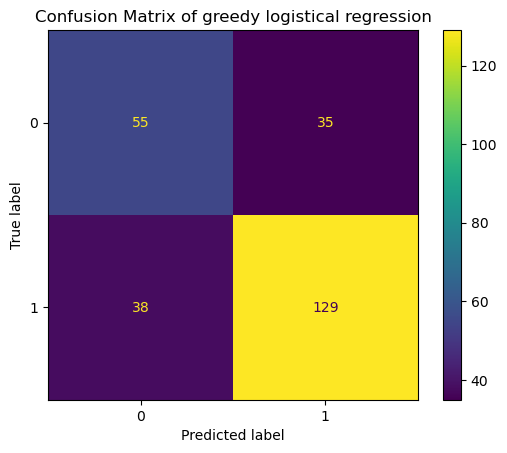

In [34]:
predicted_labels = greedy_lr.predict(X_test[selected_features])

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of greedy logistical regression")
plt.show()

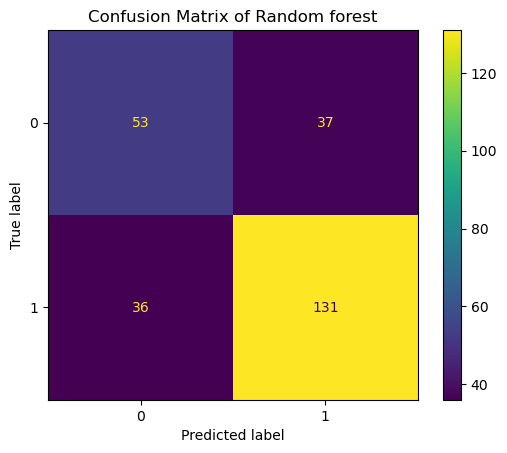

In [35]:
predicted_labels = clf.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Random forest")
plt.show()

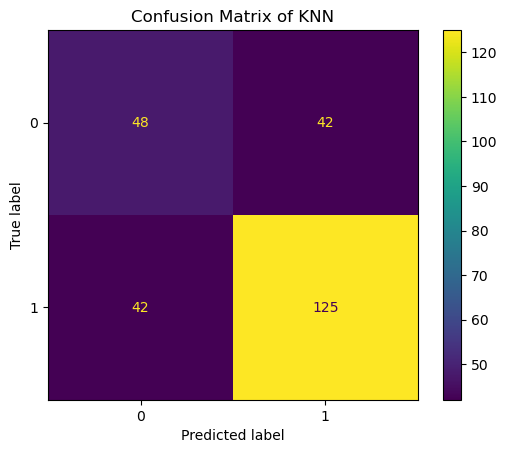

In [36]:
predicted_labels = neigh.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of KNN")
plt.show()

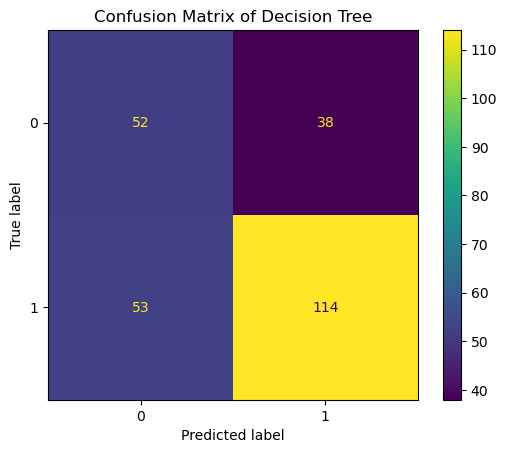

In [37]:
predicted_labels = dtc.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Decision Tree")
plt.show()

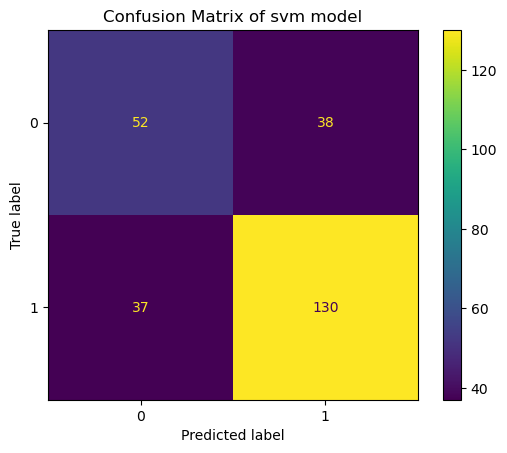

In [38]:
predicted_labels = svm_model.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of svm model")
plt.show()

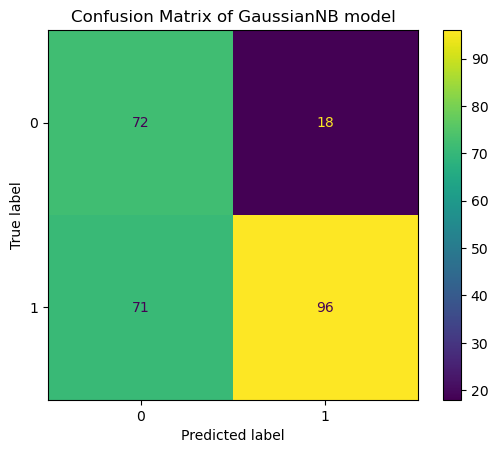

In [39]:
predicted_labels = gnb.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of GaussianNB model")
plt.show()

In [40]:
len(X_test)

257

## Dimensionality Reduction

In [41]:
df_reduced = df_all_scaled.copy()

df_reduced = df_reduced.drop(columns=['TEAM NO'])

svd = TruncatedSVD(n_components=10, random_state=42) 
X_svd = svd.fit_transform(df_reduced)
X_svd.shape

(924, 10)

In [42]:
df_10d = pd.DataFrame(X_svd)
df_10d["TEAM NO"] = df_all_scaled['TEAM NO']

In [43]:
pred_winners2 = []
true_winners2 = []
difference_vectors2 = []

skipped = 0  # Track skipped matchups
count = 0
for matchup in matchups:
    team_1_NO = str(matchup[0])
    team_0_NO = str(matchup[1])

    # Look up rows in df_10d
    team_1_row = df_10d[df_10d["TEAM NO"] == team_1_NO]
    team_0_row = df_10d[df_10d["TEAM NO"] == team_0_NO]

    if not team_1_row.empty and not team_0_row.empty:
        true_winners2.append(matchup[2])
        count += 1
        # Drop TEAM NO and convert to numpy arrays
        team_1_vector = team_1_row.drop(columns=["TEAM NO"]).iloc[0].values
        team_0_vector = team_0_row.drop(columns=["TEAM NO"]).iloc[0].values

        # Compute difference vector
        difference_vector = team_1_vector - team_0_vector
        difference_vectors2.append(difference_vector)
    else:
        skipped += 1

print(f"✅ Finished creating reduced difference vectors. Skipped {skipped} matchups.")
print(len(matchups))
print(count)
# Convert to DataFrame
X = pd.DataFrame(difference_vectors2, columns=[f"SVD_{i+1}" for i in range(10)])
y = np.array(true_winners2)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

✅ Finished creating reduced difference vectors. Skipped 26 matchups.
881
855


### Logistic Regression

In [44]:
LR_model_dr = LogisticRegression()
LR_model_dr.fit(X_train, y_train)

predicted_winners = LR_model_dr.predict(X_test)
model_results_df['Feature Reduced Linear Regression'] = cross_val_score(LR_model_dr,X, y, cv=14, scoring='accuracy')

print("Accuracy:", accuracy_score(y_test, predicted_winners))

Accuracy: 0.7237354085603113


### Greedy Logistic Regression

In [45]:
# Greedy logistic regression
greedy_lr_dr = LogisticRegression(max_iter=1000, random_state=42)
feature_scores = {}

# First, score each feature individually
for feature in X_train.columns:
    score = cross_val_score(greedy_lr_dr, X_train[[feature]], y_train, cv=10, scoring='accuracy').mean()
    feature_scores[feature] = score

# Sort features by their single-feature performance
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

selected_features = []
best_score = 0

for feature, _ in sorted_features:
    current_features = selected_features + [feature]
    score = cross_val_score(greedy_lr_dr, X_train[current_features], y_train, cv=10, scoring='accuracy').mean()
    
    if score > best_score:
        selected_features.append(feature)
        best_score = score
        print(f"✅ Added: {feature} | New CV Accuracy: {score:.4f}")
    else:
        print(f"❌ Skipped: {feature} | CV Accuracy would be: {score:.4f}")


greedy_lr_dr.fit(X_train[selected_features], y_train)


predicted_winners_glr_dr = greedy_lr_dr.predict(X_test[selected_features])
model_results_df['Feature Reduced Greedy Linear Regression'] = cross_val_score(greedy_lr_dr,X, y, cv=14, scoring='accuracy')

print("Accuracy:", accuracy_score(y_test, predicted_winners_glr_dr))

✅ Added: SVD_1 | New CV Accuracy: 0.6773
✅ Added: SVD_2 | New CV Accuracy: 0.6940
❌ Skipped: SVD_3 | CV Accuracy would be: 0.6890
❌ Skipped: SVD_5 | CV Accuracy would be: 0.6873
✅ Added: SVD_6 | New CV Accuracy: 0.7058
❌ Skipped: SVD_7 | CV Accuracy would be: 0.6991
❌ Skipped: SVD_4 | CV Accuracy would be: 0.7008
❌ Skipped: SVD_9 | CV Accuracy would be: 0.7007
❌ Skipped: SVD_8 | CV Accuracy would be: 0.7057
❌ Skipped: SVD_10 | CV Accuracy would be: 0.6856
Accuracy: 0.7120622568093385


In [46]:
selected_features

['SVD_1', 'SVD_2', 'SVD_6']

In [47]:
model_results_df

,Baseline,Linear Regression All,Linear Regression Greedy,Random Forest,KNN,Decision Tree Classifier,SVM,Gaussian NB,Feature Reduced Linear Regression,Feature Reduced Greedy Linear Regression
0,0.666667,0.741935,0.741935,0.629032,0.645161,0.516129,0.596774,0.661290,0.661290,0.661290
1,0.682540,0.655738,0.672131,0.590164,0.557377,0.459016,0.590164,0.672131,0.639344,0.639344
2,0.730159,0.786885,0.786885,0.754098,0.688525,0.688525,0.721311,0.737705,0.655738,0.655738
3,0.666667,0.754098,0.754098,0.688525,0.639344,0.590164,0.721311,0.704918,0.704918,0.704918
4,0.650794,0.672131,0.672131,0.639344,0.622951,0.622951,0.639344,0.639344,0.606557,0.606557
5,0.793651,0.803279,0.819672,0.786885,0.754098,0.622951,0.786885,0.754098,0.836066,0.836066
6,0.682540,0.622951,0.639344,0.803279,0.688525,0.622951,0.770492,0.721311,0.836066,0.836066
7,0.761905,0.688525,0.688525,0.819672,0.557377,0.672131,0.737705,0.803279,0.770492,0.770492
8,0.682540,0.688525,0.688525,0.754098,0.639344,0.590164,0.737705,0.655738,0.786885,0.786885
9,0.682540,0.590164,0.606557,0.672131,0.524590,0.573770,0.639344,0.639344,0.688525,0.688525


### Random Forest Classifer

In [48]:
clf = RandomForestClassifier(max_depth=1000, random_state=42)
clf.fit(X_train, y_train)

preds_rf = clf.predict(X_test)
model_results_df['Feature Reduced Random Forest'] = cross_val_score(clf,X, y, cv=14, scoring='accuracy')

print("Random Forest")
print("Accuracy:", accuracy_score(y_test, preds_rf))

Random Forest
Accuracy: 0.6536964980544747


### KNN

In [49]:
neigh = KNeighborsClassifier(n_neighbors=21)
neigh.fit(X_train, y_train)

preds_knn = neigh.predict(X_test)
model_results_df['Feature Reduced KNN'] = cross_val_score(neigh,X, y, cv=14, scoring='accuracy')

print("KNN")
print("Accuracy:", accuracy_score(y_test, preds_knn))

KNN
Accuracy: 0.6653696498054474


### Decision Tree Classifier

In [50]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)

preds_dtc = dtc.predict(X_test)
model_results_df['Feature Reduced Decision Tree Classifier'] = cross_val_score(dtc,X, y, cv=14, scoring='accuracy')
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test, preds_dtc))


Decision Tree
Accuracy: 0.6108949416342413


### SVM

In [51]:
svm_model = svm.SVC()
svm_model.fit(X_train, y_train)

preds_svm = svm_model.predict(X_test)
model_results_df['Feature Reduced SVM'] = cross_val_score(svm_model,X, y, cv=14, scoring='accuracy')

print("svm")
print("Accuracy:", accuracy_score(y_test, preds_svm))

svm
Accuracy: 0.6770428015564203


### Gaussian NB

In [52]:
gnb = GaussianNB()

gnb_preds = gnb.fit(X_train, y_train).predict(X_test)
model_results_df['Feature Reduced Gaussian NB']= cross_val_score(gnb,X, y, cv=14, scoring='accuracy')

print("gaussianNB")
print("Accuracy:", accuracy_score(y_test, gnb_preds))

gaussianNB
Accuracy: 0.6809338521400778


## Confusion Matricies

Accuracy: 0.7237354085603113


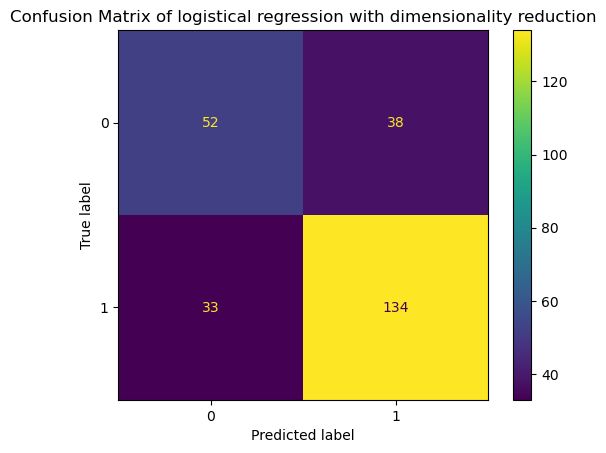

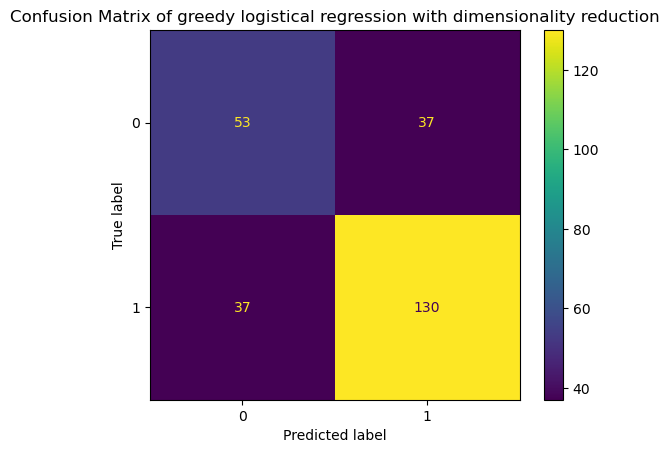

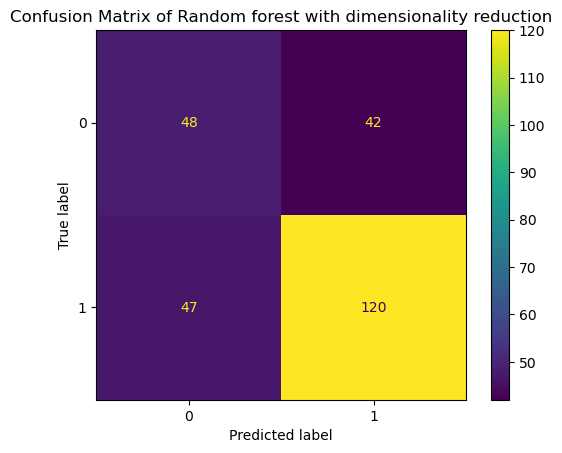

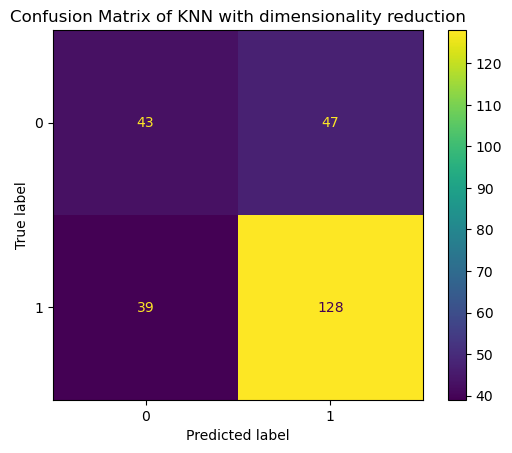

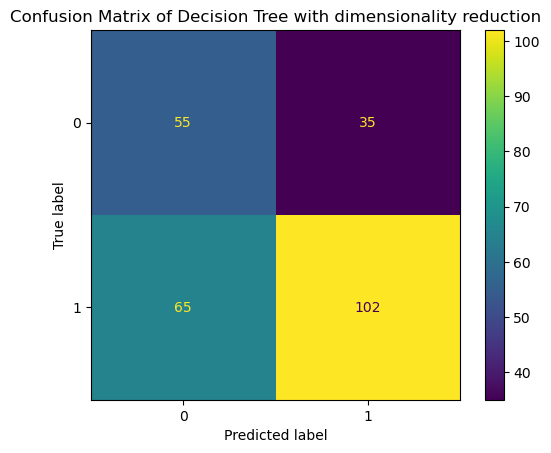

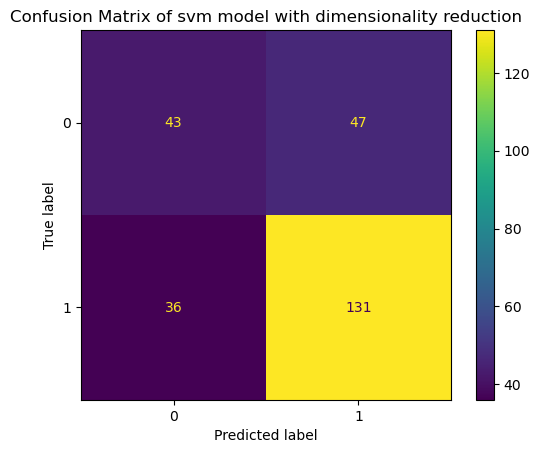

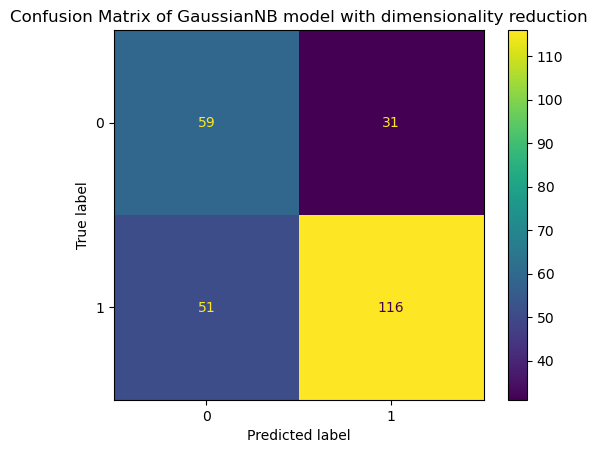

In [53]:
predicted_labels = LR_model_dr.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)

print("Accuracy:", accuracy_score(y_test, predicted_labels))

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of logistical regression with dimensionality reduction")
plt.show()


predicted_labels = greedy_lr_dr.predict(X_test[selected_features])

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of greedy logistical regression with dimensionality reduction")
plt.show()

predicted_labels = clf.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Random forest with dimensionality reduction")
plt.show()

predicted_labels = neigh.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of KNN with dimensionality reduction")
plt.show()

predicted_labels = dtc.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of Decision Tree with dimensionality reduction")
plt.show()

predicted_labels = svm_model.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of svm model with dimensionality reduction")
plt.show()

predicted_labels = gnb.predict(X_test)

cm = confusion_matrix(y_test, predicted_labels)


disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix of GaussianNB model with dimensionality reduction")
plt.show()

## Models Using Correlation Based Feature Selection

In [54]:
difference_vectors3 = []
true_winners3 = []

skipped = 0  # Track how many matchups we skip

for matchup in matchups:
    team_1_NO = str(matchup[0])  # Make sure they're strings upfront
    team_0_NO = str(matchup[1])

    team_1_row = reduced_df_scaled[reduced_df_scaled["TEAM NO"] == team_1_NO]
    team_0_row = reduced_df_scaled[reduced_df_scaled["TEAM NO"] == team_0_NO]

    # Check if both teams exist in reduced_df_scaled
    if not team_1_row.empty and not team_0_row.empty:
        true_winners3.append(matchup[2])  # Now append only if valid

        # Get stats and remove "TEAM NO" column
        team_1_stats = team_1_row.drop(columns=["TEAM NO"]).iloc[0].values
        team_0_stats = team_0_row.drop(columns=["TEAM NO"]).iloc[0].values

        # Create difference vector
        difference_vector = team_1_stats - team_0_stats
        difference_vectors3.append(difference_vector)
    else:
        skipped += 1

print(f'Number of Matchups: {len(difference_vectors3)}')
print(f"✅ Finished creating vectors. Skipped {skipped} matchups due to missing teams.")

X3 = pd.DataFrame(difference_vectors3, columns=reduced_df_scaled.drop(columns=["TEAM NO"]).columns)
y3 = np.array(true_winners3)

X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=42)

Number of Matchups: 855
✅ Finished creating vectors. Skipped 26 matchups due to missing teams.


### Logistic Regression

In [55]:
LR_model_dr = LogisticRegression()
LR_model_dr.fit(X_train3, y_train3)

predicted_winners3 = LR_model_dr.predict(X_test3)
model_results_df['CFS Linear Regression'] = cross_val_score(LR_model_dr,X3, y3, cv=14, scoring='accuracy')
print("Accuracy:", accuracy_score(y_test3, predicted_winners3))

c:\Users\dornerj\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dornerj\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.ht

Accuracy: 0.6575875486381323


c:\Users\dornerj\AppData\Local\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Greedy Logistic Regression

In [56]:
# Greedy logistic regression
greedy_lr_dr = LogisticRegression(max_iter=1000, random_state=42)
feature_scores = {}

# First, score each feature individually
for feature in X_train3.columns:
    score = cross_val_score(greedy_lr_dr, X_train3[[feature]], y_train3, cv=10, scoring='accuracy').mean()
    feature_scores[feature] = score

# Sort features by their single-feature performance
sorted_features = sorted(feature_scores.items(), key=lambda x: x[1], reverse=True)

selected_features = []
best_score = 0

for feature, _ in sorted_features:
    current_features = selected_features + [feature]
    score = cross_val_score(greedy_lr_dr, X_train3[current_features], y_train3, cv=10, scoring='accuracy').mean()
    
    if score > best_score:
        selected_features.append(feature)
        best_score = score
        print(f"✅ Added: {feature} | New CV Accuracy: {score:.4f}")
    else:
        print(f"❌ Skipped: {feature} | CV Accuracy would be: {score:.4f}")


greedy_lr_dr.fit(X_train3[selected_features], y_train3)


predicted_winners_glr_dr = greedy_lr_dr.predict(X_test3[selected_features])
model_results_df['CFS Greedy Linear Regression'] = cross_val_score(greedy_lr_dr,X3, y3, cv=14, scoring='accuracy')
print("Accuracy:", accuracy_score(y_test3, predicted_winners_glr_dr))

✅ Added: KenPom_Barttorvik_WAB | New CV Accuracy: 0.6772
❌ Skipped: R SCORE | CV Accuracy would be: 0.6772
✅ Added: KenPom_Barttorvik_BADJ O RANK | New CV Accuracy: 0.6772
❌ Skipped: TeamRankings_Neutral_TR RATING | CV Accuracy would be: 0.6705
❌ Skipped: Q1 W | CV Accuracy would be: 0.6772
✅ Added: ShootingSplits_CLOSE TWOS FG% | New CV Accuracy: 0.6822
❌ Skipped: TeamRankings_Neutral_V 1-25 WINS | CV Accuracy would be: 0.6806
✅ Added: Barttorvik_Neutral_WAB | New CV Accuracy: 0.6855
❌ Skipped: Q1 PLUS Q2 W | CV Accuracy would be: 0.6822
❌ Skipped: Barttorvik_Neutral_TALENT RANK | CV Accuracy would be: 0.6705
❌ Skipped: Barttorvik_Home_W | CV Accuracy would be: 0.6805
❌ Skipped: Barttorvik_Home_WAB | CV Accuracy would be: 0.6855
❌ Skipped: Barttorvik_Neutral_BADJ EM RANK | CV Accuracy would be: 0.6789
✅ Added: Barttorvik_Neutral_ELITE SOS RANK | New CV Accuracy: 0.6939
❌ Skipped: TeamRankings_Neutral_HI | CV Accuracy would be: 0.6923
❌ Skipped: KenPom_Barttorvik_PPPO RANK | CV Accurac

In [57]:
selected_features

['KenPom_Barttorvik_WAB',
 'KenPom_Barttorvik_BADJ O RANK',
 'ShootingSplits_CLOSE TWOS FG%',
 'Barttorvik_Neutral_WAB',
 'Barttorvik_Neutral_ELITE SOS RANK',
 'KenPom_Barttorvik_ELITE SOS',
 'TeamRankings_Home_LO',
 'Barttorvik_Home_PPPO RANK',
 'TeamRankings_Neutral_LO',
 'Barttorvik_Neutral_W',
 'Barttorvik_Home_EFG% RANK',
 'KenPom_Barttorvik_TOV% RANK',
 'KenPom_Barttorvik_TOV%']

### Random Forest 

In [70]:
clf = RandomForestClassifier(max_depth=1000, random_state=42)
clf.fit(X_train3, y_train3)

preds_rf = clf.predict(X_test3)
model_results_df['CFS Random Forest'] = cross_val_score(clf,X3, y3, cv=14, scoring='accuracy')
print("Random Forest")
print("Accuracy:", accuracy_score(y_test3, preds_rf))
importances = clf.feature_importances_

feature_names = X_train3.columns

feature_importance = list(zip(feature_names, importances))
 
# Sort by importance (descending)
feature_importance_sorted = sorted(feature_importance, key=lambda x: x[1], reverse=True)
 
# Print top features
for feature, importance in feature_importance_sorted:
    print(f'{feature}: {importance:.4f}')
top_5_features = feature_importance_sorted[:5]
print(top_5_features)
#print(importances)

Random Forest
Accuracy: 0.7276264591439688
KenPom_Barttorvik_WAB: 0.0299
Barttorvik_Neutral_BADJ EM RANK: 0.0286
R SCORE: 0.0247
ShootingSplits_CLOSE TWOS FG%: 0.0220
TeamRankings_Neutral_LO: 0.0218
KenPom_Barttorvik_BADJ O RANK: 0.0209
TeamRankings_Home_LO: 0.0209
Barttorvik_Neutral_ELITE SOS RANK: 0.0203
TeamRankings_Neutral_TR RATING: 0.0190
Barttorvik_Neutral_TALENT RANK: 0.0187
Barttorvik_Away_BADJ D RANK: 0.0186
KenPom_Barttorvik_BADJ D RANK: 0.0186
Barttorvik_Neutral_BADJ D: 0.0165
ShootingSplits_THREES FG%D RANK: 0.0158
Barttorvik_Home_FTR RANK: 0.0156
Q1 PLUS Q2 W: 0.0149
Barttorvik_Home_WAB: 0.0148
KenPom_Barttorvik_PPPO RANK: 0.0147
ShootingSplits_CLOSE TWOS D SHARE RANK: 0.0145
KenPom_Barttorvik_2PT% RANK: 0.0140
TeamRankings_Away_LO: 0.0137
KenPom_Barttorvik_EFG% RANK: 0.0132
Barttorvik_Home_FTRD RANK: 0.0131
Q1 W: 0.0131
KenPom_Barttorvik_W: 0.0131
ShootingSplits_FARTHER TWOS FG%D RANK: 0.0129
Barttorvik_Away_EFGD% RANK: 0.0128
Barttorvik_Away_2PT%D RANK: 0.0128
KenPom_Ba

### KNN

In [59]:
neigh = KNeighborsClassifier(n_neighbors=21)
neigh.fit(X_train3, y_train3)

preds_knn = neigh.predict(X_test3)
model_results_df['CFS KNN'] = cross_val_score(neigh,X3, y3, cv=14, scoring='accuracy')
print("KNN")
print("Accuracy:", accuracy_score(y_test3, preds_knn))

KNN
Accuracy: 0.6964980544747081


### Decision Tree Classifier

In [60]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train3, y_train3)

preds_dtc = dtc.predict(X_test3)
model_results_df['CFS Decision Tree Classifier'] = cross_val_score(dtc,X3, y3, cv=14, scoring='accuracy')
print("Decision Tree")
print("Accuracy:", accuracy_score(y_test3, preds_dtc))

Decision Tree
Accuracy: 0.6186770428015564


In [61]:
len(X_test3)

257

### SVM

In [62]:
svm_model = svm.SVC()
svm_model.fit(X_train3, y_train3)

preds_svm = svm_model.predict(X_test3)
model_results_df['CFS SVM'] = cross_val_score(svm_model,X3, y3, cv=14, scoring='accuracy')
print("svm")
print("Accuracy:", accuracy_score(y_test3, preds_svm))

svm
Accuracy: 0.6926070038910506


### Gaussian NB

In [63]:
gnb = GaussianNB()

gnb_preds = gnb.fit(X_train3, y_train3).predict(X_test3)
model_results_df['CFS Gaussian NB'] = cross_val_score(gnb,X3, y3, cv=14, scoring='accuracy')
print("gaussianNB")
print("Accuracy:", accuracy_score(y_test3, gnb_preds))

gaussianNB
Accuracy: 0.6848249027237354


In [64]:
model_results_df


,Baseline,Linear Regression All,Linear Regression Greedy,Random Forest,KNN,Decision Tree Classifier,SVM,Gaussian NB,Feature Reduced Linear Regression,Feature Reduced Greedy Linear Regression,...,Feature Reduced Decision Tree Classifier,Feature Reduced SVM,Feature Reduced Gaussian NB,CFS Linear Regression,CFS Greedy Linear Regression,CFS Random Forest,CFS KNN,CFS Decision Tree Classifier,CFS SVM,CFS Gaussian NB
0,0.666667,0.741935,0.741935,0.629032,0.645161,0.516129,0.596774,0.661290,0.661290,0.661290,...,0.629032,0.612903,0.596774,0.645161,0.645161,0.645161,0.677419,0.564516,0.612903,0.693548
1,0.682540,0.655738,0.672131,0.590164,0.557377,0.459016,0.590164,0.672131,0.639344,0.639344,...,0.606557,0.606557,0.590164,0.655738,0.655738,0.622951,0.606557,0.573770,0.606557,0.639344
2,0.730159,0.786885,0.786885,0.754098,0.688525,0.688525,0.721311,0.737705,0.655738,0.655738,...,0.704918,0.672131,0.721311,0.770492,0.770492,0.704918,0.737705,0.622951,0.704918,0.721311
3,0.666667,0.754098,0.754098,0.688525,0.639344,0.590164,0.721311,0.704918,0.704918,0.704918,...,0.622951,0.688525,0.721311,0.639344,0.639344,0.688525,0.639344,0.622951,0.704918,0.721311
4,0.650794,0.672131,0.672131,0.639344,0.622951,0.622951,0.639344,0.639344,0.606557,0.606557,...,0.622951,0.672131,0.590164,0.688525,0.688525,0.639344,0.573770,0.606557,0.655738,0.672131
5,0.793651,0.803279,0.819672,0.786885,0.754098,0.622951,0.786885,0.754098,0.836066,0.836066,...,0.524590,0.803279,0.786885,0.704918,0.704918,0.786885,0.688525,0.606557,0.721311,0.786885
6,0.682540,0.622951,0.639344,0.803279,0.688525,0.622951,0.770492,0.721311,0.836066,0.836066,...,0.557377,0.754098,0.836066,0.754098,0.754098,0.803279,0.754098,0.655738,0.770492,0.688525
7,0.761905,0.688525,0.688525,0.819672,0.557377,0.672131,0.737705,0.803279,0.770492,0.770492,...,0.688525,0.786885,0.754098,0.639344,0.639344,0.868852,0.754098,0.622951,0.786885,0.770492
8,0.682540,0.688525,0.688525,0.754098,0.639344,0.590164,0.737705,0.655738,0.786885,0.786885,...,0.590164,0.655738,0.655738,0.688525,0.688525,0.737705,0.704918,0.573770,0.704918,0.672131
9,0.682540,0.590164,0.606557,0.672131,0.524590,0.573770,0.639344,0.639344,0.688525,0.688525,...,0.606557,0.704918,0.639344,0.672131,0.672131,0.688525,0.704918,0.491803,0.655738,0.672131


In [65]:
import pandas as pd
from scipy.stats import ttest_rel

# Example: your DataFrame is called model_results_df
baseline = model_results_df.columns[0]

# Store results in a dictionary
t_test_results = {}

for model in model_results_df.columns[1:]:
    t_stat, p_value = ttest_rel(model_results_df[baseline], model_results_df[model], alternative='less')
    t_test_results[model] = {'t_stat': t_stat, 'p_value': p_value}

# Convert to DataFrame for easy viewing
t_test_df = pd.DataFrame(t_test_results).T
print(t_test_df)


                                            t_stat   p_value
Linear Regression All                     1.507146  0.922158
Linear Regression Greedy                  1.258981  0.884912
Random Forest                             0.581684  0.714635
KNN                                       4.506123  0.999705
Decision Tree Classifier                  7.074430  0.999996
SVM                                       1.855365  0.956822
Gaussian NB                               2.089791  0.971572
Feature Reduced Linear Regression         0.051956  0.520323
Feature Reduced Greedy Linear Regression  0.051956  0.520323
Feature Reduced Random Forest             2.191269  0.976376
Feature Reduced KNN                       2.413060  0.984345
Feature Reduced Decision Tree Classifier  5.411016  0.999941
Feature Reduced SVM                       1.699359  0.943481
Feature Reduced Gaussian NB               1.603516  0.933585
CFS Linear Regression                     1.840442  0.955681
CFS Greedy Linear Regres

In [66]:
# Apply Bonferroni correction (0.05 / 21)
alpha_corrected = 0.05 / 21

# Filter results where p-value < corrected threshold
significant_results = t_test_df[t_test_df['p_value'] < alpha_corrected]

print("Significant results (p < {:.5f}):".format(alpha_corrected))
print(significant_results)

Significant results (p < 0.00238):
Empty DataFrame
Columns: [t_stat, p_value]
Index: []
